World Bank Projects & Operations provides access to basic information on all of the World Bank's lending projects from 1947 to the present. The dataset includes basic information such as the project title, task manager, country, project id, sector, themes, commitment amount, product line, and financing. It also provides links to publicly disclosed online documents.

Using the status variable build a binary classifier to predict the probability
whether a project will be “closed” or “canceled/distressed

In [53]:
#convert xls to csv 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
read_file = pd.read_excel ("world_bank_data.xls")
  
# Write the dataframe object
# into csv file
read_file.to_csv ("bank_data.csv", 
                  index = None,
                  header=True)
    
# read csv file and convert 
# into a dataframe object
df = pd.DataFrame(pd.read_csv("bank_data.csv"))
  
# show the dataframe
df

,"World Bank Projects, data as of 06/13/2022 22:00:02 EST",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
1,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
2,P252350,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,...,0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
3,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,...,0,Ministry of Finance,Investment Project Financing,B,NaN,Public Administration - Transportation,Rural and Inter-Urban Roads,NaN,NaN,NaN
4,P252337,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,...,340000,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,P000019,Africa,Africa,Dropped,NaN,UEMOA Regional Financial Sector Project,NaN,NaN,NaN,http://projects.worldbank.org/P000019/null?lan...,...,0,NaN,Specific Investment Loan,C,NaN,NaN,NaN,NaN,NaN,NaN
21541,P000017,Africa,Africa,Closed,Bank Approved,Engineering and Technical Assistance Project,NaN,NaN,NaN,http://projects.worldbank.org/P000017/engineer...,...,0,NaN,Technical Assistance Loan,C,NaN,Power,NaN,NaN,Legal institutions for a market economy,Regional integration
21542,P000010,Africa,Africa,Closed,NaN,Regional Development Project (03),NaN,NaN,NaN,http://projects.worldbank.org/P000010/null?lan...,...,0,NaN,Financial Intermediary Loan,B,NaN,Banking Institutions,"Other Agriculture, Fishing and Forestry",Other Transportation,Environmental policies and institutions,Other financial and private sector development
21543,P000003,Africa,Africa,Closed,Bank Approved,REIMP(CEN.ENV.INFO),NaN,NaN,NaN,http://projects.worldbank.org/P000003/reimpcen...,...,4100000,NaN,Specific Investment Loan,C,NaN,Other Public Administration,Other Information and Communications Technologies,Social Protection,Land administration and management,Environmental policies and institutions


Finding Null values and dropping unecessary columns 

In [54]:
#take 1st row in a list 
df.iloc[0] = df.iloc[0].tolist()
df.columns = df.iloc[0]


In [55]:
df 

,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
0,Project ID,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Implementing Agency,Consultant Services Required,Project URL,...,Grant Amount,Borrower,Lending Instrument,Environmental Assessment Category,Environmental and Social Risk,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
1,id,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,impagency,cons_serv_reqd_ind,url,...,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
2,P252350,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,...,0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
3,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,...,0,Ministry of Finance,Investment Project Financing,B,NaN,Public Administration - Transportation,Rural and Inter-Urban Roads,NaN,NaN,NaN
4,P252337,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,...,340000,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,P000019,Africa,Africa,Dropped,NaN,UEMOA Regional Financial Sector Project,NaN,NaN,NaN,http://projects.worldbank.org/P000019/null?lan...,...,0,NaN,Specific Investment Loan,C,NaN,NaN,NaN,NaN,NaN,NaN
21541,P000017,Africa,Africa,Closed,Bank Approved,Engineering and Technical Assistance Project,NaN,NaN,NaN,http://projects.worldbank.org/P000017/engineer...,...,0,NaN,Technical Assistance Loan,C,NaN,Power,NaN,NaN,Legal institutions for a market economy,Regional integration
21542,P000010,Africa,Africa,Closed,NaN,Regional Development Project (03),NaN,NaN,NaN,http://projects.worldbank.org/P000010/null?lan...,...,0,NaN,Financial Intermediary Loan,B,NaN,Banking Institutions,"Other Agriculture, Fishing and Forestry",Other Transportation,Environmental policies and institutions,Other financial and private sector development
21543,P000003,Africa,Africa,Closed,Bank Approved,REIMP(CEN.ENV.INFO),NaN,NaN,NaN,http://projects.worldbank.org/P000003/reimpcen...,...,4100000,NaN,Specific Investment Loan,C,NaN,Other Public Administration,Other Information and Communications Technologies,Social Protection,Land administration and management,Environmental policies and institutions


In [56]:
#drop columns 
# 'Consultant Services Required', 'Project Development Objective', 'Implementing Agency' , 'Project URL', 'Borrower', 'Environmental Assessment Category', 'Environmental and Social Risk'
df.drop(['Project Closing Date','Board Approval Date','Project ID', 'Consultant Services Required', 'Implementing Agency' , 'Project URL', 'Borrower', 'Environmental Assessment Category', 'Environmental and Social Risk'], axis=1, inplace=True)

In [57]:
df.head()

,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
0,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
1,regionname,countryname,projectstatusdisplay,last_stage_reached_name,project_name,pdo,projectfinancialtype,curr_project_cost,curr_ibrd_commitment,curr_ida_commitment,curr_total_commitment,grantamt,lendinginstr,sector1,sector2,sector3,theme1,theme2
2,Eastern and Southern Africa,Republic of Rwanda,Active,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,IDA,120000000,0,120000000,120000000,0,Program-for-Results Financing,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
3,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,NaN,39140000,0,35200000,35200000,0,Investment Project Financing,Public Administration - Transportation,Rural and Inter-Urban Roads,NaN,NaN,NaN
4,Eastern and Southern Africa,Republic of Kenya,Dropped,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,NaN,340000,0,0,0,340000,Investment Project Financing,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization


In [58]:
#drop first 2 rows 
df.drop(df.index[0:2], inplace=True)

In [59]:
#print unique values in project status column 
df['Project Status'].unique()

array(['Active', 'Dropped', 'Pipeline', nan, 'Closed'], dtype=object)

In [60]:
#convert project status to numeric 
df['Project Status'] = df['Project Status'].replace(['Active', 'Dropped', 'Pipeline', 'nan', 'Closed'], [1, 2, 3, 4, 5])

#print
df['Project Status'].value_counts()

5.0    15783
1.0     3088
2.0     1725
3.0      943
Name: Project Status, dtype: int64

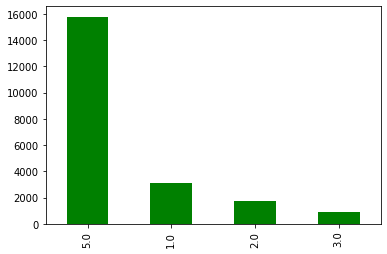

In [61]:
df['Project Status'].value_counts().plot(kind='bar', color='green')
#save plot to a file
plt.savefig('project_status.png')

In [62]:
df.head()

,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,Eastern and Southern Africa,Republic of Rwanda,1.0,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,IDA,120000000,0,120000000,120000000,0,Program-for-Results Financing,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
3,East Asia and Pacific,Democratic Republic of Timor-Leste,1.0,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,NaN,39140000,0,35200000,35200000,0,Investment Project Financing,Public Administration - Transportation,Rural and Inter-Urban Roads,NaN,NaN,NaN
4,Eastern and Southern Africa,Republic of Kenya,2.0,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,NaN,340000,0,0,0,340000,Investment Project Financing,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
5,Western and Central Africa,Republic of Cameroon,3.0,NaN,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,NaN,100000000,0,100000000,100000000,0,Investment Project Financing,NaN,NaN,NaN,NaN,NaN
6,Western and Central Africa,Republic of Chad,3.0,NaN,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",NaN,150000000,0,150000000,150000000,0,Investment Project Financing,NaN,NaN,NaN,NaN,NaN


In [63]:
#convert all NaN values to 0 
df.fillna(0, inplace=True)


In [64]:
df 

,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,Eastern and Southern Africa,Republic of Rwanda,1.0,Bank Approved,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,IDA,120000000,0,120000000,120000000,0,Program-for-Results Financing,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,0
3,East Asia and Pacific,Democratic Republic of Timor-Leste,1.0,Bank Approved,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,0,39140000,0,35200000,35200000,0,Investment Project Financing,Public Administration - Transportation,Rural and Inter-Urban Roads,0,0,0
4,Eastern and Southern Africa,Republic of Kenya,2.0,Concept Review,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,0,340000,0,0,0,340000,Investment Project Financing,0,0,0,"Public expenditure, financial management and p...",Decentralization
5,Western and Central Africa,Republic of Cameroon,3.0,0,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,0,100000000,0,100000000,100000000,0,Investment Project Financing,0,0,0,0,0
6,Western and Central Africa,Republic of Chad,3.0,0,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",0,150000000,0,150000000,150000000,0,Investment Project Financing,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,Africa,Africa,2.0,0,UEMOA Regional Financial Sector Project,0,0,10000000,0,10000000,10000000,0,Specific Investment Loan,0,0,0,0,0
21541,Africa,Africa,5.0,Bank Approved,Engineering and Technical Assistance Project,0,IDA,6100000,0,5500000,5500000,0,Technical Assistance Loan,Power,0,0,Legal institutions for a market economy,Regional integration
21542,Africa,Africa,5.0,0,Regional Development Project (03),0,0,55000000,15000000,40000000,55000000,0,Financial Intermediary Loan,Banking Institutions,"Other Agriculture, Fishing and Forestry",Other Transportation,Environmental policies and institutions,Other financial and private sector development
21543,Africa,Africa,5.0,Bank Approved,REIMP(CEN.ENV.INFO),0,Other,19700000,0,0,0,4100000,Specific Investment Loan,Other Public Administration,Other Information and Communications Technologies,Social Protection,Land administration and management,Environmental policies and institutions


In [65]:
df['Last Stage Reached Name'].unique()

array(['Bank Approved', 'Concept Review', 0, 'Begin Negotiation',
       'Decision Meeting', 'Begin Appraisal'], dtype=object)

In [66]:
#covert last stage reached name to numeric
df['Last Stage Reached Name'] = df['Last Stage Reached Name'].replace(['0','Bank Approved', 'Concept Review', 'Begin Negotiation', 'Decision Meeting', 'Begin Appraisal'], [0, 1, 2, 3, 4,5])

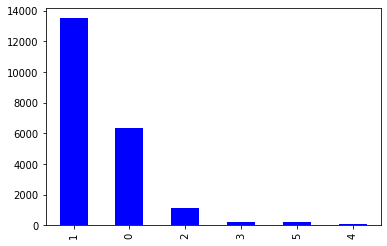

In [67]:
#plot last stage reached name
df['Last Stage Reached Name'].value_counts().plot(kind='bar', color='blue')
#save plot to a file
plt.savefig('last_stage_reached.png')

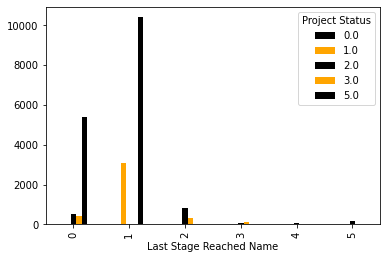

In [68]:
#plot between last stage reached name and project status
df.groupby(['Last Stage Reached Name', 'Project Status']).size().unstack().plot(kind='bar', color=['black', 'orange'])

#add label
Xlabel = df['Last Stage Reached Name']
Ylabel = df['Last Stage Reached Name']

#save plot to a file
plt.savefig('last_stage_reached_vs_project_status.png')



In [69]:
df.head()

,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,Eastern and Southern Africa,Republic of Rwanda,1.0,1,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,IDA,120000000,0,120000000,120000000,0,Program-for-Results Financing,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,0
3,East Asia and Pacific,Democratic Republic of Timor-Leste,1.0,1,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,0,39140000,0,35200000,35200000,0,Investment Project Financing,Public Administration - Transportation,Rural and Inter-Urban Roads,0,0,0
4,Eastern and Southern Africa,Republic of Kenya,2.0,2,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,0,340000,0,0,0,340000,Investment Project Financing,0,0,0,"Public expenditure, financial management and p...",Decentralization
5,Western and Central Africa,Republic of Cameroon,3.0,0,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,0,100000000,0,100000000,100000000,0,Investment Project Financing,0,0,0,0,0
6,Western and Central Africa,Republic of Chad,3.0,0,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",0,150000000,0,150000000,150000000,0,Investment Project Financing,0,0,0,0,0


In [70]:
#print unique values of financing type
df['Financing Type'].unique()
#print counts 
df['Financing Type'].value_counts()

0         8506
Other     4835
IDA       3541
Grants    2816
IBRD      1845
Name: Financing Type, dtype: int64

In [71]:
df['Lending Instrument'] = df['Lending Instrument'].replace(['0','Specific Investment Loan', 'Investment Project Financing','Technical Assistance Loan',                
'Sector Investment and Maintenance Loan','Development Policy Lending','Financial Intermediary Loan','Emergency Recovery Loan','Structural Adjustment Loan','Adaptable Program Loan',                      
'Sector Adjustment Loan','Program-for-Results Financing','Learning and Innovation Loan','UNIDENTIFIED','Programmatic Structural Adjustment Loan', 'Poverty Reduction Support Credit',             
'Rehabilitation Loan','Debt and Debt Service Reduction Loan','Special Structural Adjustment Loan'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])


In [72]:
df['Lending Instrument'].unique()
df['Lending Instrument'].value_counts()
#convert lending instrument to numeric

1     8021
2     5498
3     1653
4     1299
5     1250
6      821
7      578
8      564
9      518
10     387
11     338
0      249
12     180
13      56
14      51
15      40
16      22
17      16
18       2
Name: Lending Instrument, dtype: int64

In [73]:
df 

,Region,Country,Project Status,Last Stage Reached Name,Project Name,Project Development Objective,Financing Type,Current Project Cost,IBRD Commitment,IDA Commitment,Total IDA and IBRD Commitment,Grant Amount,Lending Instrument,Sector 1,Sector 2,Sector 3,Theme 1,Theme 2
2,Eastern and Southern Africa,Republic of Rwanda,1.0,1,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,IDA,120000000,0,120000000,120000000,0,11,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,0
3,East Asia and Pacific,Democratic Republic of Timor-Leste,1.0,1,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,0,39140000,0,35200000,35200000,0,2,Public Administration - Transportation,Rural and Inter-Urban Roads,0,0,0
4,Eastern and Southern Africa,Republic of Kenya,2.0,2,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,0,340000,0,0,0,340000,2,0,0,0,"Public expenditure, financial management and p...",Decentralization
5,Western and Central Africa,Republic of Cameroon,3.0,0,Cameroon Health System Strengthening Project,To increase utilization and quality of reprodu...,0,100000000,0,100000000,100000000,0,2,0,0,0,0,0
6,Western and Central Africa,Republic of Chad,3.0,0,Chad Agribusiness and Rural Transformation Pro...,"The project Development Objective (PDO) is ""to...",0,150000000,0,150000000,150000000,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21540,Africa,Africa,2.0,0,UEMOA Regional Financial Sector Project,0,0,10000000,0,10000000,10000000,0,1,0,0,0,0,0
21541,Africa,Africa,5.0,1,Engineering and Technical Assistance Project,0,IDA,6100000,0,5500000,5500000,0,3,Power,0,0,Legal institutions for a market economy,Regional integration
21542,Africa,Africa,5.0,0,Regional Development Project (03),0,0,55000000,15000000,40000000,55000000,0,6,Banking Institutions,"Other Agriculture, Fishing and Forestry",Other Transportation,Environmental policies and institutions,Other financial and private sector development
21543,Africa,Africa,5.0,1,REIMP(CEN.ENV.INFO),0,Other,19700000,0,0,0,4100000,1,Other Public Administration,Other Information and Communications Technologies,Social Protection,Land administration and management,Environmental policies and institutions


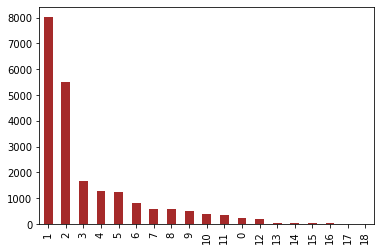

In [75]:
#plot lending instrument
df['Lending Instrument'].value_counts().plot(kind='bar', color='brown')
#add label
Xlabel = df['Lending Instrument']
Ylabel = df['Lending Instrument']
#save plot to a file
plt.savefig('lending_instrument.png')